In [979]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet,SGDClassifier,SGDRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error,mean_absolute_error,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from pandas.api.types import is_string_dtype,is_numeric_dtype
import joblib as joblib
from collections import Counter

In [980]:
df=pd.read_csv('Doctor_Fee_Train.csv')

In [981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


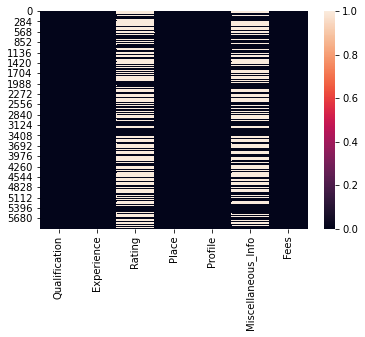

In [982]:
sns.heatmap(data=df.isna())

In [983]:
#missing values are present in datset .
#For number replace it with mean and for string replace it with mode
for col in df.columns:
    if(is_string_dtype(df[col])):
        imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        df[col]=imputer.fit_transform(df[[col]]).ravel()
    else:
        imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
        df[col]=imputer.fit_transform(df[[col]]).ravel()    

In [984]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300.0
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300.0
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100.0
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600.0
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100.0


In [985]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   object 
 2   Rating              5961 non-null   object 
 3   Place               5961 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  5961 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 326.1+ KB


In [986]:
df['Experience']=df['Experience'].str.replace(' years experience','').astype(int)
df['Rating']=df['Rating'].str.replace('%','').astype(int)
df['Place']=df['Place'].str.split(',',expand = True)[1]
#df['Qualification']=df['Qualification'].str.split(',',expand = True)[0]
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,Ernakulam,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12,98,Bangalore,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9,100,Bangalore,ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300.0
3,"BSc - Zoology, BAMS",12,100,Bangalore,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20,100,Chennai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98,Bangalore,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300.0
5957,MBBS,33,100,Chennai,General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...,100.0
5958,MBBS,41,97,Delhi,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600.0
5959,"MBBS, MD - General Medicine",15,90,Mumbai,General Medicine,General Medical Consultation Viral Fever Treat...,100.0


In [987]:
df['Experience']=np.where(df.Experience>10,1,0)
df['Rating']=np.where(df.Rating>60,1,0)
print(df['Experience'].value_counts(),'\n',df['Rating'].value_counts())


1    4034
0    1927
Name: Experience, dtype: int64 
 1    5934
0      27
Name: Rating, dtype: int64


In [988]:
df['Place'].value_counts()

 Bangalore             1283
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: Place, dtype: int64

In [989]:
#replace sector 5 with Bangalore
df['Place']=df['Place'].str.strip().replace('Sector 5','Bangalore')
df['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [990]:
list_=[]
education_list=[]
counter_list=[]
key_list=[]
value_list=[]
qualif_series=df.Qualification.str.split(',')

print(qualif_series)
for val in qualif_series.values:
    list_.append(len(val))
df_new=pd.DataFrame({'Qualification':qualif_series.values,'Count':list_})
for s in df_new['Qualification']:
    for data in s:
        education_list.append(data.strip().replace(',','-'))
    

    
for value in education_list:
    print(value)

for key in Counter(education_list).keys():
    key_list.append(key)
    
for value in Counter(education_list).values():
    value_list.append(value)
    
print(type(Counter(education_list).keys()))
df_unique_edu=pd.DataFrame({'Qualification':key_list,'Count':value_list})   
print(df_unique_edu.sort_values(by='Count',ascending=False))

print(df_unique_edu['Qualification'].head(10))

0                [BHMS,  MD - Homeopathy]
1         [BAMS,  MD - Ayurveda Medicine]
2       [MBBS,  MS - Otorhinolaryngology]
3                  [BSc - Zoology,  BAMS]
4                                  [BAMS]
                      ...                
5956                    [MBBS,  MS - ENT]
5957                               [MBBS]
5958                               [MBBS]
5959       [MBBS,  MD - General Medicine]
5960           [BDS,  MDS - Orthodontics]
Name: Qualification, Length: 5961, dtype: object
BHMS
MD - Homeopathy
BAMS
MD - Ayurveda Medicine
MBBS
MS - Otorhinolaryngology
BSc - Zoology
BAMS
BAMS
BAMS
BHMS
BDS
MBBS
MD - General Medicine
BSc
BDS
MBBS
MS
DNB - ENT
BAMS
BDS
MDS
BDS
MDS - Oral & Maxillofacial Surgery
MBBS
Diploma in Otorhinolaryngology (DLO)
DNB - ENT
MBBS
MD - General Medicine
MBBS
Diploma in Otorhinolaryngology (DLO)
MBBS
MF- Homeopathy
MBBS
MS - ENT
MBBS
MDS
DNB
BDS
MBBS
DNB - ENT
MBBS
MBBS
Fellowship of College of General Practice (FCGP)
MBBS
DDVL
BDS
MBBS
IB

MBBS
BDS
MDS - Prosthodontics
MBBS
BHMS
BDS
MDS - Conservative Dentistry & Endodontics
MBBS
MS - Otorhinolaryngology
FRACS
MBBS
MD - General Medicine
LCEH
BDS
MBBS
Diploma in Practical Dermatology
Fellowship in Aesthetic Medicine
MBBS
MS - ENT
BAMS
MBBS
MD - Dermatology
Venereology & Leprosy
BAMS
MBBS
MD - Skin & VD
DDV
Fellowship in Dermatological Laser Surgery
DHMS (Diploma in Homeopathic Medicine and Surgery)
Member of the Royal Society for the Promotion of Health (UK) (MRSH)
Diploma in Aesthetic Medicine
MBBS
MS - Otorhinolaryngology
MBBS
DDV
MBBS
MD - Dermatology
Venereology & Leprosy
BDS
MDS
DDVL
MBBS
BHMS
MS - ENT
MBBS
MBBS
DDV
MBBS
MS - ENT
MD - Dermatology
MBBS
BDS
MCIP
MD - Acupuncture
PGDCFS
PGDFOS
Diploma in Journalism
BAMS
BHMS
MD - Homoeopathic Philosophy
BAMS
MBBS
MD - Dermatology
Venereology & Leprosy
BDS
MDS - Periodontics
MDS - Oral & Maxillofacial Surgery
BDS
BAMS
MD - Acupuncture
BDS
MDS - Orthodontics and Dentofacial Orthopaedics
MBBS
DDV
BHMS
MD - Homeopathy
BDS
M

DNHE
BHMS
MD - Homeopathy
Fellowship in Orthopaedic Rehabilitation (FOR)
MBBS
DLO
MS - ENT
BDS
Fellow of Academy of General Education (FAGE)
MIDA
MDS - Periodontics
Certificate Course in Dental Lasers
Certificate Course in Implantology
BHMS
MD - Dermatology
Venereology & Leprosy
BDS
BDS
BDS
MBBS
MD - Internal Medicine
DM - Endocrinology
BDS
MBBS
DVD
MD - Dermatology
BHMS
BHMS
PGCR
MBBS
MS - Otorhinolaryngology
MBBS
MS - ENT
DNB
MBBS
MBBS
BHMS
MDS - Pedodontics
BDS
MBBS
MBBS
DNB - Dermatology & Venereology
DDV
DVD
MBBS
DDV
FRGUHS
MBBS
MBBS
MD - Dermatology
MBBS
MD - General Medicine
Diploma in Diabetes/Endocrinology (Middlesex University)
BDS
MDS
MD - Dermatology
Venereology & Leprosy
MBBS
MS - ENT
MBBS
MBBS
DDV
MBBS
MD - General Medicine
BDS
MS - ENT
MBBS
MDS - Periodontics
BDS
BHMS
MBBS
MD - Paediatrics
BDS
BAMS
MBBS
MS - ENT
MBBS
BAMS
MS - Ayurveda
BHMS
BDS
MDS - Conservative Dentistry & Endodontics
MBBS
MBBS
DDV
MD - Dermatology
MBBS
DGO
MBBS
MD - Dermatology
Venereology & Leprosy
P

BAMS
MBBS
BHMS
MBBS
MS - ENT
Diploma in Otorhinolaryngology (DLO)
BAMS
MBBS
DDVL
MS - Otorhinolaryngology
MBBS
MBBS
Diploma in Medical Radio-Diagnosis
MBBS
Diploma in Otorhinolaryngology (DLO)
DNB - ENT
BDS
MBBS
Diploma in Dermatology
Fellowship in Aesthetic Medicine
MBBS
D.Ortho Fellow Arthroscopy & Arthroplasty(AUST)
DNB - Orthopedics/Orthopedic Surgery
MBBS
MD - Dermatology
MBBS
MBBS
MD - General Medicine
DHMS (Diploma in Homeopathic Medicine and Surgery)
MD - Dermatology
MBBS
DNB - Dermatology
Venereology & Leprosy
MNAMS - DERMATOLOGY
MBBS
Post Graduate Course in Diabetology
Fellowship in Diabetology
MD - Dermatology
Venereology & Leprosy
MBBS
Fellowship in Pediatric Dermatology
Fellowship in Dermatological Laser Surgery
Fellow Hair Transplant Surgery
MBBS
Basic Life Support (BLS)
ACLS
Advanced Trauma Life Support (ATLS)
BAMS
BDS
Fellowship and Diplomate in Implantology from ICOI (USA)
Certificate in Dental Implants
MBBS
MD - Medicine
BHMS
MS - ENT
MBBS
DDVL
MBBS
MD - General Medic

MS - Otorhinolaryngology
MBBS
MBBS
MBBS
DNB - Family Medicine
BAMS
BAMS
BDS
MDS - Conservative Dentistry & Endodontics
BDS
BHMS
MD - Homeopathy
MBBS
MD - General Medicine
BDS
MDS - Conservative Dentistry & Endodontics
BAMS
MBBS
MD - General Medicine
BHMS
MBBS
DDV
BAMS
BDS
BHMS
MD - Homeopathy
MBBS
Diploma in Otorhinolaryngology (DLO)
FCPS - Oto-Rhino-Laryngology
DNB - Otorhinolaryngology
MDS - Prosthodontist And Crown Bridge
BDS
BAMS
BDS
MDS - Conservative Dentistry & Endodontics
BAMS
MBBS
MS - General Surgery
FRCS - General Surgery
MBBS
Postgraduate Diploma Clinical Cardiology (PGDCC)
BDS
MDS - Orthodontics
MBBS
MD - Dermatology
Venereology & Leprosy
MBBS
BAMS
BAMS
MD - Ayurveda Medicine
BAMS
BDS
BDS
MDS - Oral & Maxillofacial Surgery
MBBS
MD - Dermatology
Venereology & Leprosy
BAMS
BDS
MBBS
Post Graduate Diploma in Diabetology (PGDD)
Fellowship in Diabetology
BDS
MBBS
MD - Pulmonary Medicine
MS - ENT
BHMS
MBBS
MD - General Medicine
Diploma in Diabetology
BDS
MDS - Oral & Maxillofacia

MBBS
BAMS
MD - Ayurveda Medicine
MBBS
MS - ENT
BDS
MBBS
MS - General Surgery
FRCS - General Surgery
MBBS
MD - General Medicine
BAMS
MD - Ayurveda Medicine
MBBS
Diploma in Dermatology
MD - Dermatology
BDS
MDS - Prosthodontics
BAMS
MBBS
MS - ENT
MBBS
Post Graduate Diploma in Health Sciences (PGDHSc)
Master of Health Sciences (MHSc)
Fellowship in Diabetology
MBBS
MBBS
MD - Dermatology
BHMS
MBBS
MD - General Medicine
MBBS
MD - Dermatology
Venereology & Leprosy
MBBS
BHMS
MD - Homeopathy
MBBS
Postgraduate Diploma Clinical Cardiology (PGDCC)
Master of Health Sciences (MHSc)
MRCP (UK)
MD - Medicine
BHMS
PGMHA
BDS
MDS - Conservative Dentistry & Endodontics
BDS
MD - Dermatology
MBBS
MBBS
DDV
BHMS
MBBS
MS - ENT
MBBS
MS - Otorhinolaryngology
MD - Homeopathy
BHMS
BDS
BDS
Certificate of Oral Implantology
BHMS
Diploma in Dermatology
MBBS
BAMS
MBBS
MD - Medicine
BDS
BAMS
BDS
BAMS
BDS
MDS - Paedodontics And Preventive Dentistry
MBBS
Indian Diploma Critical Care Medicine (IDCCM)
Diploma in Emergency Med

MS - ENT
Diploma in Otorhinolaryngology (DLO)
MBBS
MS - ENT
DNB - ENT
MNAMS (Membership of the National Academy)
BHMS
BDS
MDS - Orthodontics
BDS
BHMS
Post Graduate Diploma in Emergency Services (PGDEMS)
PG Certificate Course In Diabetes Education(PGDCE)
MD - General Medicine
PG in Diabetology (USA)
FIMSA
BHMS
MSc - Physiology
BAMS
BDS
MBBS
MS - ENT
BDS
MD - Dermatology
Venereology & Leprosy
DVD
MBBS
MBBS
MD - Obstetrics & Gynaecology
Fellowship in Minimal Access Surgery
BDS
Diploma in Hospital Administration
MBBS
DDVL
BAMS
PG Diploma Clinical Research
MBBS
DO
Diploma in Dietetics & Public Health Nutrition (DDPHN)
MBBS
Diploma in Tuberculosis and Chest Diseases (DTCD)
MD - Internal Medicine
MBBS
MRCGP
MBBS
MD - Medicine
BDS
MD - Physician
Robert Turner Diabetes Research Training
WHO/IDF/EASD Cambridge Diabetes Training
FCD - Diabetology
Certificate Course in Evidence Based Diabetes Management (CCEBDM)
Post Graduate Diploma in Diabetology (PGDD)
MBBS
MS - ENT
BAMS
MBBS
Diploma in Otorhin

Ph.D(Doctor of Philosophy)
BAMS
Diploma in Hospital Administration
PG Diploma in Value Education and Spirtuality
BDS
Certification in Aesthetic Dentistry
DNB - Dermatology
Venereology & Leprosy
MBBS
MD - Dermatology
MDS - Oral & Maxillofacial Surgery
MS - Otorhinolaryngology
MBBS
Fellowship In Laryngology Bronchoesophagology
BHMS
MD - Homeopathy
MBBS
MD - General Medicine
BDS
MDS - Orthodontics and Dentofacial Orthopaedics
MBBS
MD - Dermatology
Venereology & Leprosy
MBBS
MS - ENT
Diploma in Otorhinolaryngology (DLO)
Diploma in Otorhinolaryngology (DLO)
MBBS
MBBS
Diploma in Otorhinolaryngology (DLO)
MBA
BAMS
MBBS
MD - Dermatology
Venereology & Leprosy
MBBS
MD - Skin & VD
MBBS
BDS
Certificate of Oral Implantology
MDS - Orthodontics
MBBS
Diploma in Otorhinolaryngology (DLO)
Diploma in Otorhinolaryngology (DLO)
MBBS
BHMS
MBBS
MD - Dermatology
MBBS
MBBS
MD - Dermatology
Venereology & Leprosy
DNB - Dermatology & Venereology
Fellowship in Pediatric Dermatology
MBBS
MS - ENT
B.Sc
BAMS
MBBS
DDV

In [991]:
list_

[2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 3,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 5,
 6,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 2,
 4,
 2,
 2,
 5,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 2,
 1,
 2,
 1,
 4,
 2,
 4,
 1,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 4,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 3,
 2,
 4,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 2,
 4,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 3,
 3,
 1,
 3,
 2,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 2,
 1,
 2,
 1,
 5,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 4,
 5,
 1,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 1,


In [992]:
qualif_df.max()

0    Training in Facial Aesthetics
dtype: object

In [993]:
for i in df['Qualification'].value_counts().index:
    print(i,df['Qualification'].value_counts()[i])

BDS 488
BHMS 477
BAMS 471
MBBS 334
MBBS, MS - ENT 220
MBBS, MD - Dermatology 178
MBBS, MD - General Medicine 177
MBBS, MD - Dermatology , Venereology & Leprosy 140
BHMS, MD - Homeopathy 93
MBBS, DDVL 92
MBBS, Diploma in Otorhinolaryngology (DLO) 84
BAMS, MD - Ayurveda Medicine 82
BDS, MDS - Conservative Dentistry & Endodontics 68
MBBS, DDV 66
BDS, MDS 63
BDS, MDS - Oral & Maxillofacial Surgery 57
MD - Dermatology , Venereology & Leprosy, MBBS 52
BDS, MDS - Prosthodontics 45
MBBS, MS - Otorhinolaryngology 44
MBBS, MD - Internal Medicine 43
MBBS, MD - Medicine 41
BDS, MDS - Orthodontics 41
MS - ENT, MBBS 37
BDS, MDS - Paedodontics And Preventive Dentistry 32
MD - Dermatology, MBBS 31
MBBS, Diploma in Dermatology 31
BDS, MDS - Periodontology and Oral Implantology 29
BDS, MDS - Orthodontics and Dentofacial Orthopaedics 29
MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT 27
BDS, MDS - Prosthodontist And Crown Bridge 25
BDS, MDS - Pedodontics 25
BDS, MDS - Periodontics 24
Get inspired b

BDS, Fellowship in Aesthetic Dentistry (FAD) 2
MBBS, MF- Homeopathy, Fellowship in Diabetology, Fellowship of College of General Practice (FCGP) 2
MBBS, AFIH 2
MBBS, Diploma in Otorhinolaryngology (DLO), MD - Community Medicine 2
MBBS, MD - General Medicine, DM - Gastroenterology 2
PhD - Orthodontics & Dentofacial Orthopaedics, BDS, MDS - Orthodontics 2
BHMS, Diploma in Diet and Nutrition 2
MBBS, Division of Clinical Psychology (DCP) 2
MBBS, MD - Anaesthesiology 2
MBBS, MD - Obstetrics & Gynaecology, Fellowship of College of General Practice (FCGP) 1
MBBS, DVD, Fellowship of College of General Practice (FCGP) 1
MD - Homeopathy, BHMS, DHMS (Diploma in Homeopathic Medicine and Surgery), Diploma in Hospital Management, Diploma in Trichology - Cosmetology, Diploma In Skin Aesthetics, Diploma in Weight Loss 1
MBBS, DNB - Radiation Oncology 1
BDS, DMD - Doctor of Dental Medicine 1
MBBS, Diploma in Dermatology, MD - Microbiology 1
GCEH 1
BDS, MDS - Conservative Dentistry & Endodontics, Certif

MBBS, DNB - ENT, MS - ENT 1
BDS, MDS - Oral & Maxillofacial Surgery, DICOI 1
MBBS, MD - Skin & VD, Fellowship In Cosmetic Dermatology, Training Certificate in Hair Transplant 1
MBBS, MD - General Medicine, FRCP, D.Sc, FACP, FRCP, FRCP 1
MBBS, MD - Dermatology , Venereology & Leprosy, MRCP (UK) 1
MBBS, F.S.R.H 1
MBBS, Post Graduate Diploma in Medical Cosmetology (PGDMC), Diploma in Practical Dermatology 1
FRCS - General Surgery, MBBS 1
MD - Dermatology, DDV, Diploma in Hospital Administration 1
MS - ENT, DNB - ENT, Diploma in Otorhinolaryngology (DLO) 1
BAMS, M. D. IN KAYACHIKISTA 1
MBBS, MCh - Urology 1
MS - General Surgery, MBBS 1
BDS, MDS - Orthodontics, MOrth 1
MBBS, DNB - General Medicine, Fellowship of College of General Practice (FCGP), FCCS, Post Graduate Diploma in Diabetology (PGDD) 1
MBBS, MD - Dermatology, FRCPCH 1
BDS, MDS - Oral Medicine and Radiology, FICOI 1
MBBS, Diploma in Otorhinolaryngology (DLO), DO, MS - ENT 1
BSc - Zoology, BAMS 1
MBBS, MD - Pediatrics, Post Gradu

MBBS, Member of the Royal College of General Practitioners UK (MRCGP), Post Graduate Diploma in Diabetology (PGDD) 1
MD - Acupuncture, PhD- Ayurveda, BEMS, MBBS 1
MBBS, DNB, Diploma in Otorhinolaryngology (DLO) 1
BDS, MDS - Periodontics, PG Diploma In Clinical Cosmetology (PGDCC), Post-Graduate Certificate in Oral Implantology (PGCOI) 1
BAMS, MD-Ayurvedic Vachaspati 1
BAMS, MA (Yoga Shastra), Diploma in Yoga Shikshaka, Yoga Instructor's Course 1
MS - ENT, MBBS, DNB 1
BDS, PhD - Orthodontics & Dentofacial Orthopaedics, MDS - Oral & Maxillofacial Surgery 1
DNB, MS - ENT 1
MRCS (UK), MBBS 1
MBBS, MD - TB & Chest, BHMS 1
MBBS, Diploma in Otorhinolaryngology (DLO), DAA - Diploma in Allergy Asthma and Immunology 1
MBBS, MD - Internal Medicine, DM - Endocrinology 1
BDS, MDS - Oral & Maxillofacial Surgery, FFDRCSI 1
MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery) 1
BHMS, Diploma of Nutrition & Diet Planning 1
DNB - ENT,

DNB - ENT, MBBS, Diploma in Otorhinolaryngology (DLO) 1
BDS, MDS, Fellowship In Cosmetic Dermatology 1
MS - ENT, MBBS, DNB - ENT, Fellow of Academy of General Education (FAGE) 1
MBBS, MD - General Medicine, Diploma in Health Administration, LLB 1
MBBS, MRCS (UK), MRCP (UK) 1
MBBS, DDVL, F.C.P.S (Dermatology) 1
MBBS, MD - Dermatology, AFIH 1
BDS, MDS - Conservative Dentistry & Endodontics, Certificate in Dental Implants, Diploma in Laser Dentistry 1
MRCPS, MBBS 1
BDS, MBA 1
BDS, Diploma in Educational Psychology 1
MBBS, DNB - Dermatology & Venereology, DDVL, FCPS Skin & VD 1
BAMS, MS - General Surgery 1
MBBS, DNB - Otorhinolaryngology, Diploma in Otorhinolaryngology (DLO), DAA - Diploma in Allergy Asthma and Immunology 1
BDS, MDS - Periodontology and Oral Implantology, Master of Oral Laser Applications 1
BAMS, Fellowship in Applied Nutrition(FAN) 1
Diploma in Child Health (DCH), MBBS 1
DNB - General Medicine, MBBS 1
MD - Dermatology, Fellowship In Dermatosurgery, MBBS 1
DNB - ENT, Diplo

MBBS, DNB - Dermatology & Venereology, MD - Dermatology, Advance Fellowship in Laser & Dermatosurgery 1
BDS, FPFA, MDS - Orthodontics and Dentofacial Orthopaedics, Fellowship in Implant and Esthetic Dentistry 1
MBBS, MD - Paediatrics 1
MBBS, DVD, MRCGP 1
MBBS, Diploma in Otorhinolaryngology (DLO), FRCS - General Surgery 1
BDS, Post Graduate Diploma in Orthodontics, Post Graduate Certificate in Advanced Oral Implantology, Implant Externship Program 1
MD - Ayurveda Medicine, BAMS, Diploma in Family Medicine (DFM) 1
MBBS, MS - General Surgery, Diploma in Endoscopy 1
DNB - ENT, MS - ENT, DORL (ENT), FCPS - Oto-Rhino-Laryngology, MRCS (UK), MBBS 1
BDS, Certificate in Dental Implantology, Certificate in Orthodontics 1
MBBS, MS - Obstetrics & Gynaecology 1
BDS, MDS - Paedodontics And Preventive Dentistry, FAGE 1
BDS, MDS - Periodontics, Certificate in Aesthetic Medicine 1
BDS, MDS - Prosthodontics, Diploma in Health Administration, Certification in Laser Dentistry 1
MD - Dermatology, DNB - De

BDS, Certificate in Dental Implants, Certification in Full Mouth Rehabilitation 1
MBBS, MD - Dermatology , Venereology & Leprosy, Fellowship In Dermatosurgery, Fellowship in LASERs & Aesthetics 1
MBBS, MD - General Medicine, MRCP 1
BDS, MDS - Oral Medicine and Radiology, Certificate Course in Implantology 1
MBBS, MS - General Surgery, MCh - Urology, DNB - Urology/Genito - Urinary Surgery 1
DNB - Dermatology & Venereology, MBBS, DDVL 1
MS - Otorhinolaryngology, MBBS, FICS 1
BAMS, MD - Ayurveda Medicine, M.A - Sanskrit 1
BDS, Advanced Endotontic Course On Root Canal 1
MBBS, MS - ENT, DNB - Otorhinolaryngology, Clinical Fellowship in Rhinology 1
BHMS, Diploma in Personal Counselling Skills (DPCS) 1
DNB - Dermatology & Venereology, MBBS, DDV, DDVL 1
BDS, MDS - Oral and Maxillofacial Pathology 1
MBBS, MS - ENT, DNB - ENT, Fellowship in Rhinology and Endoscopic Skull Base Surgery 1
BDS, MDS - Orthodontics, Fellowship in ClearPath Aligners, Certificate in Invisible Braces, Invisalign Training

BAMS, MS 1
MD - Dermatology, MBBS, DNB - Dermatology & Venereology 1
MS - Ayurvedic Gynecology & Obstetrics, BAMS 1
MBBS, MD - Internal Medicine, DAA 1
MD - Ayurvedic Pharmacology, BAMS 1
MBBS, MD - General Medicine, IDCC (ISCCM) 1
MBBS, DNB - Otorhinolaryngology, DLO 1
MS - Otorhinolaryngology, Fellowship (Endoscopic Sinus Surgery), MBBS 1
MBBS, MD - General Medicine, PGDHHM 1
BHMS, MBA (HCS) 1
BDS, Post Graduate Certificate in Endodontics (PGCE), Post-Graduate Certificate in Oral Implantology (PGCOI) 1
FRCS - Otolaryngology, MS - Otrohinolaryngology, Fellowship In Pediatric Otolaryngology 1
BAMS, MD - Ayurveda Medicine, Post Graduate Diploma In Yoga 1
MBBS, DLO, PGDHHM, DNB - ENT 1
MBBS, MD - Medicine, FCSI, FSCAI 1
MBBS, DNB - Dermatology & Venereology, Fellowship in LASERs & Aesthetics 1
BDS, MDS - Periodontics, Certificate Course in Implantology 1
MDS - Oral Medicine and Radiology, BDS, PhD - Orthodontics & Dentofacial Orthopaedics 1
BDS, MDS - Periodontics, Diploma in Implantholo

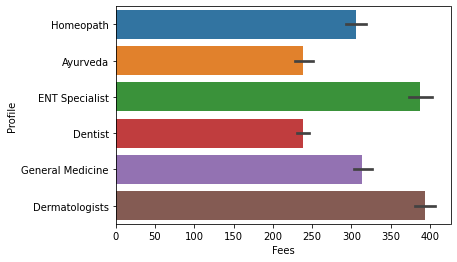

In [994]:
sns.barplot(data=df,y='Profile',x='Fees')
#ENT Specialist and Dermatologistis doctor's consultation fee is high 

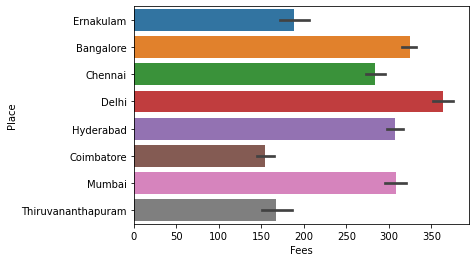

In [995]:
sns.barplot(data=df,y='Place',x='Fees')
#Doctor consultation fee is high in Delhi followed by Bangalore

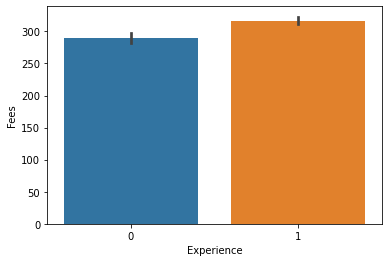

In [996]:
sns.barplot(data=df,x='Experience',y='Fees')
#doctor with high exp demanding high consultation fee 

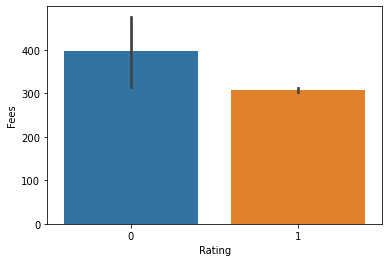

In [997]:
sns.barplot(data=df,x='Rating',y='Fees')


In [998]:
df.isna().sum()

Qualification         0
Experience            0
Rating                0
Place                 1
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

In [999]:
#drop missing record
df=df.dropna()

In [1000]:
#Convert string to number
for col in df.columns:
    if(is_string_dtype(df[col])):
        labelEnoder=LabelEncoder()
        df[col]=labelEnoder.fit_transform(df[col])

<ipython-input-1000-25bbec565bd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=labelEnoder.fit_transform(df[col])


In [1001]:
#Lets drop Miscellaneous_Info column as it is not relevant 
df=df.drop('Miscellaneous_Info',axis=1)
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,1,1,4,5,100.0
1,73,1,1,0,0,350.0
2,1135,0,1,0,3,300.0
3,464,1,1,0,0,250.0
4,10,1,1,1,0,250.0
...,...,...,...,...,...,...
5956,1075,1,1,0,3,300.0
5957,596,1,1,1,4,100.0
5958,596,1,1,3,4,600.0
5959,943,1,1,6,4,100.0


In [1002]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Fees
count,5960.000000,5960.000000,5960.00000,5960.000000,5960.000000,5960.000000
mean,596.935235,0.676678,0.99547,3.044631,2.442114,307.954362
std,413.833727,0.467784,0.06716,2.299015,1.658048,190.934916
min,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000
25%,219.000000,0.000000,1.00000,1.000000,1.000000,150.000000
50%,596.000000,1.000000,1.00000,3.000000,2.000000,300.000000
75%,943.000000,1.000000,1.00000,5.000000,4.000000,500.000000
max,1419.000000,1.000000,1.00000,7.000000,5.000000,950.000000


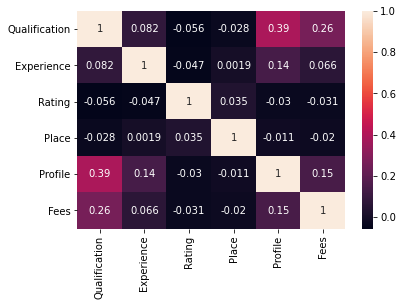

In [1003]:
#skewed data present in Qualification,Miscellaneous_Info column
#Experience,Qualification,Miscellaneous_Info,Fees has outliers
corr_=df.corr()
sns.heatmap(data=corr_,annot=True)
#Fee is strongly corelated with Qualification,rating,profile feature

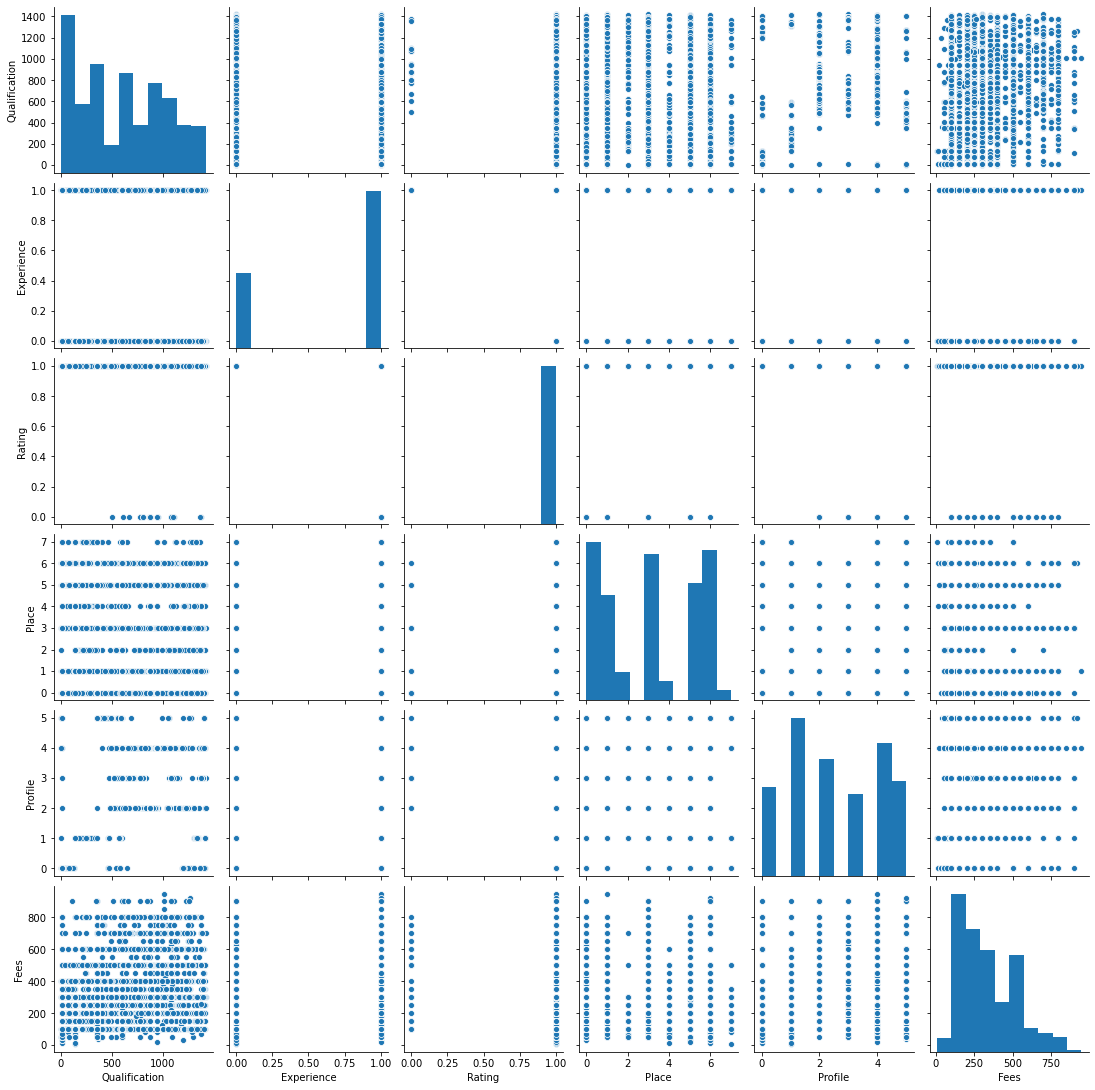

In [1004]:
sns.pairplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025611F7A730>,
      dtype=object)

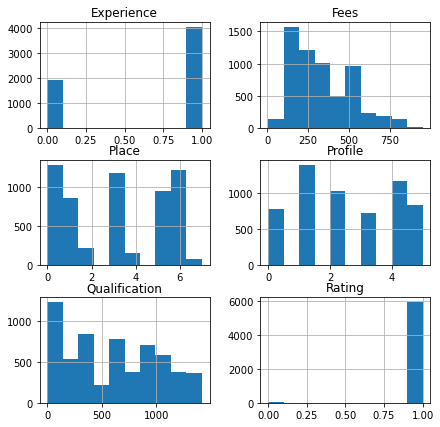

In [1005]:
df.hist(figsize=(7,7))

In [1006]:
df.skew()

Qualification     0.239447
Experience       -0.755636
Rating          -14.759910
Place             0.003100
Profile           0.108488
Fees              0.751676
dtype: float64

In [1007]:
#remove skewed data where skewness is > 0.55
for col in df.columns:
    if(df[col].skew()>0.55):
        df[col]=np.log1p(df[col])

Qualification        AxesSubplot(0.125,0.71587;0.352273x0.16413)
Experience        AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Rating              AxesSubplot(0.125,0.518913;0.352273x0.16413)
Place            AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Profile             AxesSubplot(0.125,0.321957;0.352273x0.16413)
Fees             AxesSubplot(0.547727,0.321957;0.352273x0.16413)
dtype: object

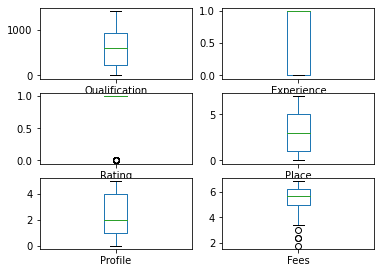

In [1008]:
df.plot.box(layout=(4,2),subplots=True,figsize=(6,6))

In [1009]:
#outlier in Miscellaneous_Info,Rating,Experience and Fees
#remove outlier
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [1010]:
df

,Qualification,Experience,Rating,Place,Profile,Fees
0,401,1,1,4,5,4.615121
1,73,1,1,0,0,5.860786
2,1135,0,1,0,3,5.707110
3,464,1,1,0,0,5.525453
4,10,1,1,1,0,5.525453
...,...,...,...,...,...,...
5956,1075,1,1,0,3,5.707110
5957,596,1,1,1,4,4.615121
5958,596,1,1,3,4,6.398595
5959,943,1,1,6,4,4.615121


In [1011]:
x=df.drop(['Fees'],axis=1)
y=df['Fees']
print(x.shape,y.shape)

(5925, 5) (5925,)


In [1012]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-4.70798044e-01,  6.93188102e-01,  0.00000000e+00,
         4.14503772e-01,  1.54204494e+00],
       [-1.26367073e+00,  6.93188102e-01,  0.00000000e+00,
        -1.32636800e+00, -1.47095343e+00],
       [ 1.30349633e+00, -1.44260987e+00,  0.00000000e+00,
        -1.32636800e+00,  3.36845590e-01],
       ...,
       [ 5.74438997e-04,  6.93188102e-01,  0.00000000e+00,
        -2.07141704e-02,  9.39445264e-01],
       [ 8.39375730e-01,  6.93188102e-01,  0.00000000e+00,
         1.28493966e+00,  9.39445264e-01],
       [-8.52730621e-01,  6.93188102e-01,  0.00000000e+00,
        -2.07141704e-02, -8.68353758e-01]])

In [1013]:
lr_reg=LinearRegression()
lasso=Lasso()
ridge=Ridge()
svr=SVR()
dtree_reg=DecisionTreeRegressor()
kn_reg=KNeighborsRegressor()
sgd_reg=SGDRegressor()
gradient_reg=GradientBoostingRegressor()
ada_reg=AdaBoostRegressor()
rand_reg=RandomForestRegressor()

In [1014]:
models=[]
models.append(('LinearRegression',lr_reg))
models.append(('SVR',svr))
models.append(('DecisionTreeRegressor',dtree_reg))
models.append(('KNeighborsRegressor',kn_reg))
models.append(('SGDRegressor',sgd_reg))
models.append(('Gradient Boost Regressor',gradient_reg))
models.append(('Ada Boost Regressor',ada_reg ))
models.append(('RandomForestRegressor',rand_reg))

In [1015]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [1016]:
#finding and storing matrix model wise
cross_val_list=[]
mse_list=[]
model_name_list=[]
mae_list=[]
r2_score_list=[]
score_list=[]

for reg_name,reg_obj in models:
    reg_obj.fit(x_train,y_train)
    y_pred=reg_obj.predict(x_test)
    cross_val_list.append(cross_val_score(reg_obj,x,y,cv=10,scoring='r2').mean())
    r2_score_list.append(r2_score(y_test,y_pred))
    mse_list.append(mean_squared_error(y_test,y_pred))
    mae_list.append(mean_absolute_error(y_test,y_pred))
    score_list.append(reg_obj.score(x_train,y_train))
    model_name_list.append(reg_name)
    

In [1017]:
df_matrix=pd.DataFrame({'Estimator_Name':model_name_list,'cross_val_Score':cross_val_list,'r2_score':r2_score_list,'mse':mse_list,'mae':mae_list,'train_score':score_list})
df_matrix

,Estimator_Name,cross_val_Score,r2_score,mse,mae,train_score
0,LinearRegression,0.064603,0.064682,0.426018,0.543454,0.067068
1,SVR,0.093095,0.096358,0.411591,0.512645,0.117342
2,DecisionTreeRegressor,-0.114116,-0.084268,0.493862,0.535808,0.538803
3,KNeighborsRegressor,0.051698,0.089660,0.414641,0.512005,0.241396
4,SGDRegressor,0.063140,0.063708,0.426462,0.543302,0.066265
5,Gradient Boost Regressor,0.181922,0.193955,0.367137,0.490735,0.220596
6,Ada Boost Regressor,0.116101,0.133676,0.394593,0.521951,0.124536
7,RandomForestRegressor,0.069741,0.117655,0.401890,0.498804,0.488843


In [1018]:
# Did nt find any good score. 